## Supervised Learning - Prognostics Breast Cancer Dataset
### Hosted on the UCI Machine Learning Repository, Free for Commercial Use


### Copyright Raytheon Company 2018 &#169;

**Notice:** This document does not contain technology or Technical Data controlled under either the U.S.
International Traffic in Arms Regulations or the U.S. Export Administration Regulations.

### About the Breast Cancer Prognostics Dataset
This dataset is for data compiled by XYZ for patients that have been given breast exams with suspect masses present, which are later determined to be either benign or malignant tumors. In this notebook, we will explore the data that is given, visualize how various features recorded about the data correlate, and how someone new to machine learning could use techniques to create a model that is capable of making probabalistic predictions of whether masses discovered from a patient's exam are either benign or malignant.

#### We first import several necessary Python packages required for the data analysis and visualization.

In [34]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 33
import seaborn as sns
import matplotlib.pyplot as plt

# Makes plots from Seaborn and matplotlib inline for the notebook.
%matplotlib inline

# Pre-emptively suppress warnings that stem from package dependency future warnings.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Import the dataset and make a quick inspection of what is available

In [55]:
data = pd.read_csv('data.csv')
print("Size of the dataset: Entries - {}, Dimensions - {}".format(*data.shape))
print("\nDimensions\n------------\n'" + "', '".join(data.columns) + "'")

Size of the dataset: Entries - 569, Dimensions - 33

Dimensions
------------
'id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'


In [38]:
data.head(n=3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [40]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#### Separate the dataset into features and labels, while also removing unneeded information.

In [66]:
features = data.drop(['id','Unnamed: 32', 'diagnosis'], axis = 1)
labels = data.diagnosis
print("Size of the features set: Entries - {}, Dimensions - {}".format(*features.shape))
print("Size of the labels set: Entries - {}, Dimensions - {}".format(labels.shape[0], 1))

Size of the features set: Entries - 569, Dimensions - 30
Size of the labels set: Entries - 569, Dimensions - 1


#### Visualize the distribution of the labels 'diagnosis' for the dataset to see the proportion of patients with benign masses to patients with malignant masses.

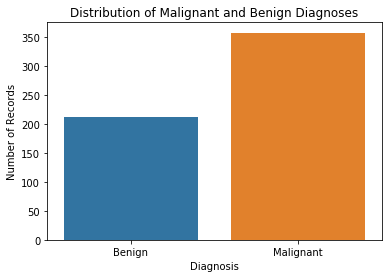

In [68]:
sns.countplot(labels);
plt.title("Distribution of Malignant and Benign Diagnoses");
plt.xlabel("Diagnosis");
plt.xticks([0,1], ['Benign','Malignant'])
plt.ylabel("Number of Records");

#### Visualize the distributions of each feature as a function of the mass label (benign or malignant).

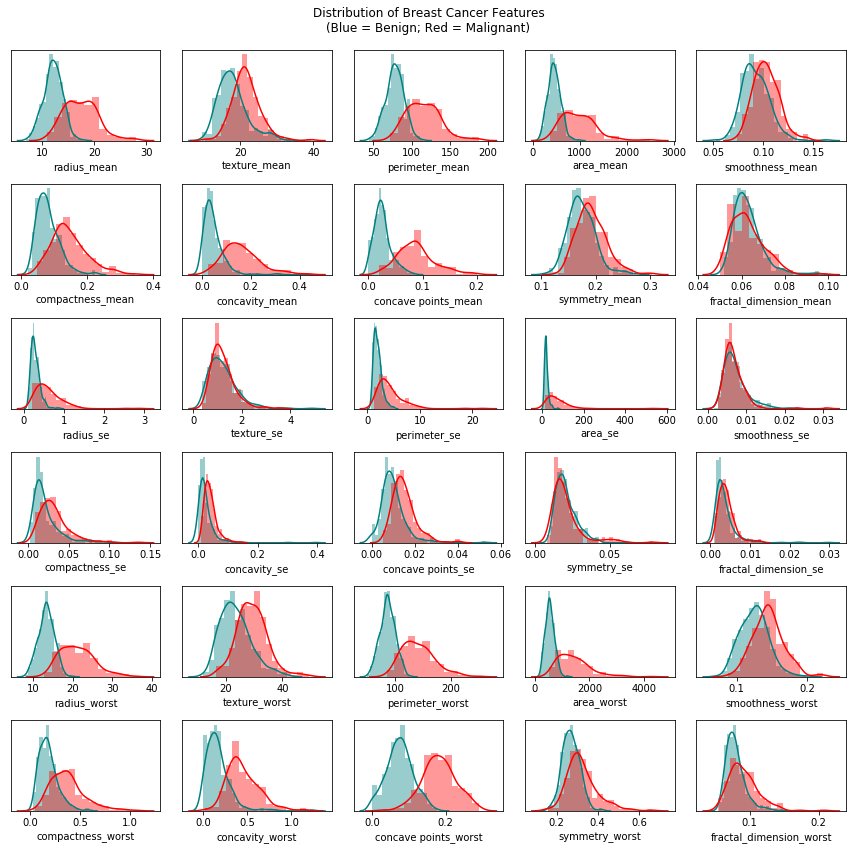

In [67]:
f, axes = plt.subplots(6, 5, figsize=(12,12))

for i, item in enumerate(features.columns):

    sns.distplot(features[labels == 'B'][item], color='teal', label='Benign', ax=axes[int(i/5), i%5]);
    sns.distplot(features[labels == 'M'][item], color='red', label='Malignant', ax=axes[int(i/5), i%5]);

f.suptitle("Distribution of Breast Cancer Features\n(Blue = Benign; Red = Malignant)")
plt.setp(axes, yticks=[]);
plt.tight_layout()
f.subplots_adjust(top=0.93)

#### Transform the data into compact acronyms for easier reference in later portions of the exercise.
**Note:** This could be done manually in the *data.csv* sheet by changing the header row, but we elect here to maintain the original copy of the data file and make all changes directly in the notebook.

In [69]:
labels = (data.diagnosis).map(dict(M = 1, B = 0))
features = features.rename(
    columns={   'radius_mean': 'RAD_M', 'texture_mean': 'TEX_M', 'perimeter_mean': 'PER_M', 
                'area_mean': 'ARA_M', 'smoothness_mean': 'SMT_M', 'compactness_mean': 'COM_M',
                'concavity_mean': 'CNV_M', 'concave points_mean': 'PTS_M', 'symmetry_mean': 'SYM_M',
                'fractal_dimension_mean': 'DIM_M', 'radius_se': 'RAD_S', 'texture_se': 'TEX_S',
                'perimeter_se': 'PER_S', 'area_se': 'ARA_S', 'smoothness_se': 'SMT_S',
                'compactness_se': 'COM_S', 'concavity_se': 'CNV_S', 'concave points_se': 'PTS_S',
                'symmetry_se': 'SYM_S', 'fractal_dimension_se': 'DIM_S', 'radius_worst': 'RAD_W',
                'texture_worst': 'TEX_W', 'perimeter_worst': 'PER_W', 'area_worst': 'ARA_W', 
                'smoothness_worst': 'SMT_W', 'compactness_worst': 'COM_W', 'concavity_worst': 'CNV_W',
                'concave points_worst': 'PTS_W', 'symmetry_worst': 'SYM_W', 'fractal_dimension_worst': 'DIM_W'
            })

features.head()

,RAD_M,TEX_M,PER_M,ARA_M,SMT_M,COM_M,CNV_M,PTS_M,SYM_M,DIM_M,RAD_S,TEX_S,PER_S,ARA_S,SMT_S,COM_S,CNV_S,PTS_S,SYM_S,DIM_S,RAD_W,TEX_W,PER_W,ARA_W,SMT_W,COM_W,CNV_W,PTS_W,SYM_W,DIM_W
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Produce a visualization of the correlation matrix for the data to identify highly-correlated features.
This visualization is often cited as a heatmap, because of the coloring schema it uses. Heatmaps make use of a gradient coloring, where one end of the spectrum is for large values, and the other end for small values. Here, correlation values are bounded between 0 and 1, with 1 being such that two features are completely correlated, and 0 such that two features share no correlation.

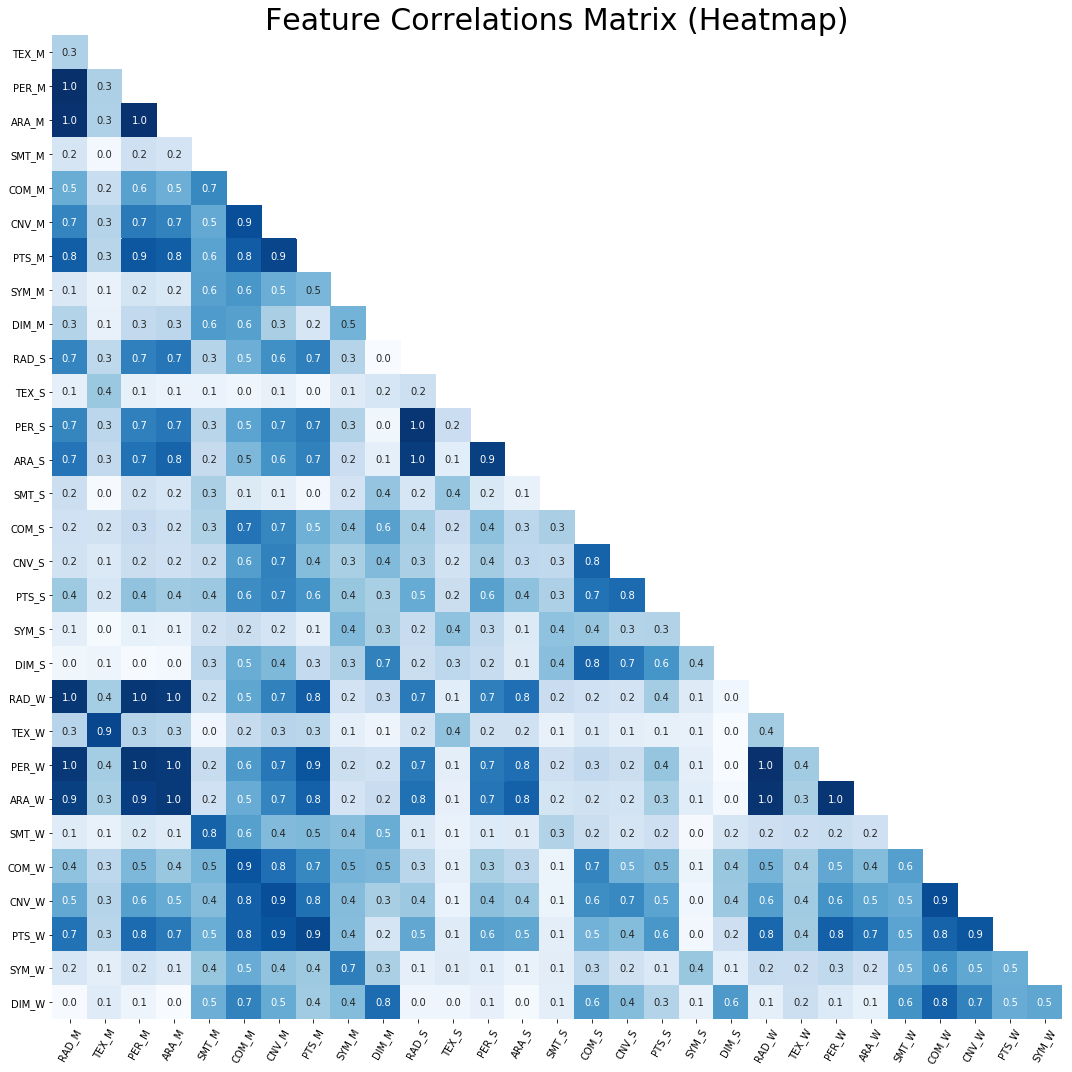

In [70]:
corr_data = np.abs(features.corr()).drop(features.columns[0], axis=0).drop(features.columns[-1], axis=1)

mask = np.zeros_like(corr_data, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

f, axes = plt.subplots(figsize=(15,15));
sns.heatmap(corr_data, annot=True, linewidths=0, fmt='.1f', mask=mask, cbar=False, cmap="Blues");
plt.xticks(rotation=60);
plt.title("Feature Correlations Matrix (Heatmap)")
axes.title.set_size(30)
plt.tight_layout()

#### Remove correlated features from the feature space to reduce dimensionality of the model we will create later in the exercise.
Typically, highly correlated features provide no useful information when it comes to learning how those features affect the outcome (or predictor) of the datapoint. If two features are highly correlated, then one feature is capable of explaining the other, so we can remove it without a loss of information. 

To reduce the dimensionality of the problem (there are 30 features for this dataset), we will assume any two features with a correlation of 0.80 or higher as highly correlated and remove one. We will remove features in the following order: Worst > Squared Error > Mean.

In [71]:
features_uncorr = features.copy() # Create a copy of the feature space


dropped = True
while(dropped): # Loop until no highly correlated features are found in the new feature space
    dropped = False
    corr = np.abs(features_uncorr.corr())
    for col in features_uncorr.columns[::-1]:
          if (corr[col] >= 0.80).sum() > 1: # More than just itself is correlated
                features_uncorr.drop([col], axis=1, inplace=True)
                dropped = True
                break

#### Produce a visualization of the correlation matrix for the data's new feature space
This visualization will show that the only features remaining are ones that are not considered highly correlated. That is to say, each feature provides some information that is unique to the feature space.

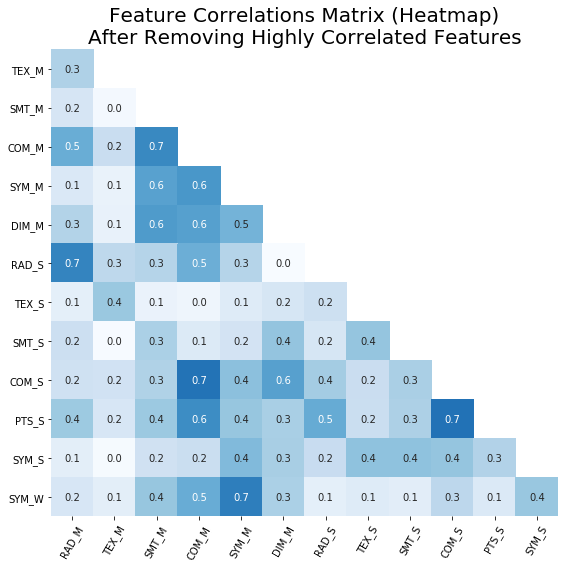

In [72]:
corr_data = np.abs(features_uncorr.corr()).drop(features_uncorr.columns[-1], axis=1).drop(features_uncorr.columns[0], axis=0)
mask = np.zeros_like(corr_data, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

f, axes = plt.subplots(figsize=(8,8));
sns.heatmap(np.abs(corr_data), annot=True, linewidths=0, mask=mask, fmt='.1f', cbar=False, cmap="Blues");
plt.xticks(rotation=60);
plt.yticks(rotation=0);
plt.title("Feature Correlations Matrix (Heatmap)\nAfter Removing Highly Correlated Features")
axes.title.set_size(20)
plt.tight_layout()

### Applying Supervised Machine Learning
The first and nearly almost always foremost action taken when looking to create a model for the data using machine learning is to separate the data into **training** and **testing** sets. In the real world, theses two subsets of data are not easily distinguished or given out of the box. Typically, the training and testing subsets are created by splitting the collected data into *representative* sets; i.e., two sets that represent both what you would want a machine to learn (training) and what data the model would encounter (testing).

#### Split the data into training and testing subsets
The proportion of data that should be separated specifically for testing purposes (data that you will not be able to use until a model is created) varies from problem to problem. With larger datsets where data is abundant, more testing is better than less. Here, we are not as fortunate, and so only 15% of the data will be used for testing. The remaining 85% will be used for training a model.

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(features[corr_data.columns], labels, test_size=0.15, stratify=labels, random_state=0)
print("Size of the training feature set: Entries - {}, Dimensions - {}".format(*X_train.shape))
print("Size of the testing feature set: Entries - {}, Dimensions - {}".format(*X_test.shape))

Size of the training feature set: Entries - 483, Dimensions - 12
Size of the testing feature set: Entries - 86, Dimensions - 12


#### Normalize each feature by removing the mean and scaling to unit variance
Some learning algorithms are sensitive to the scale of data; i.e., some algorithms consider that features with higher variance are necessarily more important, or that a feature with a mean of 100 versus 10 has a larger impact on the outcome. By normalizing each feature, we more readily see how each feature is distributed on the same scale.

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_std =  pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

#### Visualize the distributions of each uncorrelated, normalized feature as a function of the mass label (benign or malignant).

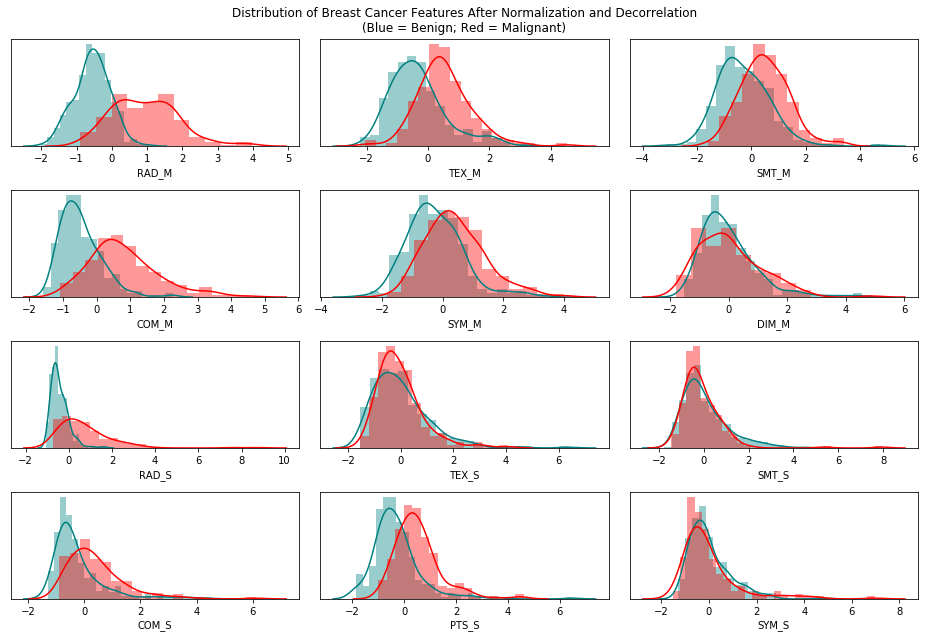

In [80]:
f, axes = plt.subplots(4,3, figsize=(13,9))
for i, item in enumerate(X_train.columns):

    sns.distplot(X_train_std[y_train == 0][item], color='teal', label='B', ax=axes[int(i/3), i%3]);
    sns.distplot(X_train_std[y_train == 1][item], color='red', label='M', ax=axes[int(i/3), i%3]);

f.suptitle("Distribution of Breast Cancer Features After Normalization and Decorrelation\n(Blue = Benign; Red = Malignant)")
plt.setp(axes, yticks=[]);
plt.tight_layout()
f.subplots_adjust(top=0.93)

### Interpreting Model Performance
It is incredibly important that the correct metrics are used when evaluating the performance of a model. Machine learning algorithms try to reduce a cost function (often called error), and maximize the objetive function, which is very dependent on the problem. Here, we are concerned with minimizing the number of false predictions for classifying the breast masses. In particular, we argue that a false negative (a mass that is malignant but flagged as benign) is far more sensitive than a false negative (a mass that is benign but flagged as malignant). 

#### Visualize the diagnosis distribution on the training set.

Naive model (all tumors benign) accuracy: 62.733%


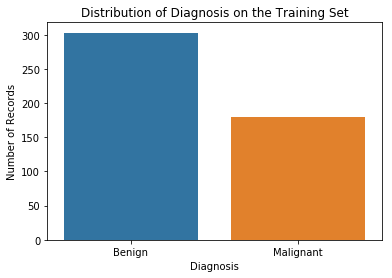

In [81]:
sns.countplot(y_train);
plt.title("Distribution of Diagnosis on the Training Set");
plt.xlabel("Diagnosis");
plt.ylabel("Number of Records");
plt.xticks([0,1], ['Benign','Malignant'])
print("Naive model (all tumors benign) accuracy: {:.3f}%".format(np.bincount(y_train)[0]/y_train.size*100))

#### A note about Naive Predictors
Consider a model that, naively) assumes every mass is benign. In such a case, the model would have a predictive accuracy of about 62%, which is equivalent to the proportion of benign mass datapoints to all datapoints. While that is not at all an impressive predictive score, imagine the case where very few datapoints are labeled as malignant. In such a case, the predictive accuracy of a naive model would be impressively high, despite it correctly predicting a single malignant tumor! This shows that the type of metrics we choose to evaluate model performace is incredibly important.

#### Start with creating two untuned models -- Logistic Linear Regression and Multi-Layer Perceptron (Neural Net)

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Logistic Regression classifier
lrc = LogisticRegression()
lrc_score = cross_val_score(clf, X_train_std, y_train, cv=5, scoring='recall')

# Multi-Layer Perceptron classifier
mlpc = MLPClassifier()
mlpc_score = cross_val_score(clf2, X_train_std, y_train, cv=5, scoring='recall')

# Show cross-validation scores and take the average of the untuned models
print("Logistic Regression classifier\n---")
for i, fold in enumerate(lrc_score):
    print("Accuracy of model on fold k={}: {:.2f}%".format(i, fold*100))
print("\nAverage accuracy of model: {:.2f}%".format(lrc_score.sum()/(i+1)*100))

print("\nMulti-Layer Perceptron classifier\n---")
for i, fold in enumerate(mlpc_score):
    print("Accuracy of model on fold k={}: {:.2f}%".format(i, fold*100))
print("\nAverage accuracy of model: {:.2f}%".format(mlpc_score.sum()/(i+1)*100))

Logistic Regression classifier
---
Accuracy of model on fold k=0: 91.67%
Accuracy of model on fold k=1: 88.89%
Accuracy of model on fold k=2: 91.67%
Accuracy of model on fold k=3: 94.44%
Accuracy of model on fold k=4: 91.67%

Average accuracy of model: 91.67%

Multi-Layer Perceptron classifier
---
Accuracy of model on fold k=0: 94.44%
Accuracy of model on fold k=1: 91.67%
Accuracy of model on fold k=2: 88.89%
Accuracy of model on fold k=3: 86.11%
Accuracy of model on fold k=4: 91.67%

Average accuracy of model: 90.56%


#### Produce validation curves that show the variance in training/validating scores for a logistic regression classifier.
Note here that we are not only using the Logistic Regression classifier model, but adding onto it a few educated guesses for parameters. The parameters are treated as a variable for input to the model, which can alter how the model is trained. Here, 'C' is a parameter which *regularizes* the learning, which can keep the model from "blowing up" and being too sensitive to individual datapoints. 

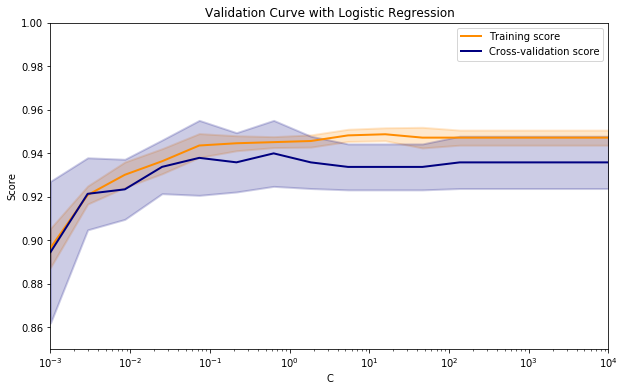

In [89]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold


param_range = np.logspace(-3, 4, 16)
train_scores, test_scores = validation_curve(
    LogisticRegression(class_weight='balanced', random_state=0), X_train_std, y_train, 
    param_name="C", param_range=param_range, cv=StratifiedKFold(n_splits=5), n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.85, 1.0)
plt.xlim(10E-4,10E3)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Looking at the figure above, we can see that the value of C that is most likely to maximize the cross-validation score (a proxy for the testing set), is somewhere around $C = 10^0 = 1$. We can confirm this by using Grid Search, which is an algorithmic approach for training a mesh of models using a *parameter grid* and taking the model that is maximal on the cross-validation set.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

# Perform GridSearch
grid_search = GridSearchCV(lrc, param_grid, cv=StratifiedKFold(n_splits=5), scoring="recall", return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_std, y_train)

# Make predictions
y_pred = grid_search.predict(X_test_std)

# Get the feature coefficients
coefs = grid_search.best_estimator_.coef_[0]

#### Visualize the confusion matrices of the model on both the training data and testing data.
We do this by using the model and making predictions back onto the training set.

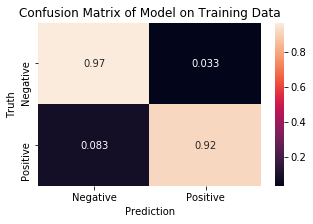

In [100]:
# confusion matrix on training data
cm_train = confusion_matrix(y_train, grid_search.predict(X_train_std))
cm_train = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(5,3));
sns.heatmap(pd.DataFrame(cm_train, columns=['Negative', 'Positive'], index=['Negative', 'Positive']), annot=True);
plt.title("Confusion Matrix of Model on Training Data");
plt.xlabel("Prediction");
plt.ylabel("Truth");

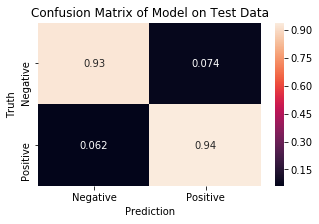

In [101]:
# confusion matrix on test data
cm_test = confusion_matrix(y_test, y_pred)
cm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(5,3));
sns.heatmap(pd.DataFrame(cm_test, columns=['Negative', 'Positive'], index=['Negative', 'Positive']), annot=True);
plt.title("Confusion Matrix of Model on Test Data");
plt.xlabel("Prediction");
plt.ylabel("Truth");

Text(0.5,1,'Decision Weight of Features for Logistic Regression Classifier')

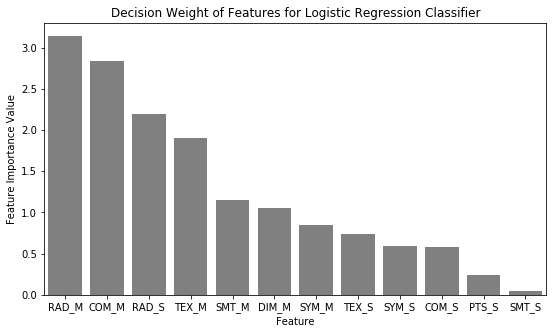

In [104]:
feature_weights = pd.Series(np.abs(coefs), index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(9,5))
sns.barplot(x=feature_weights.index, y=feature_weights.values, color='grey')
plt.xlabel("Feature")
plt.ylabel("Feature Importance Value")
plt.title("Decision Weight of Features for Logistic Regression Classifier")

#### Lets investigate what the "wrong" predictions are for the false negatives

In [103]:
probabilities = pd.DataFrame(np.round(grid_search.predict_proba(X_test_std), 4), \
                       columns=["Benign", "Malignant"], index=X_test_std.index)
predictions = pd.DataFrame(y_pred, columns=["Prediction"], index=y_test.index)
truth = pd.DataFrame(y_test.values, columns=["Truth"], index=y_test.index)

# Concatenate the results
results = pd.concat([X_test_std, probabilities, predictions, truth], axis=1)
results[results['Prediction'] != results['Truth']]

,RAD_M,TEX_M,SMT_M,COM_M,SYM_M,DIM_M,RAD_S,TEX_S,SMT_S,COM_S,PTS_S,SYM_S,Benign,Malignant,Prediction,Truth
128,0.284435,-0.679737,1.323187,1.453707,0.699238,0.262564,0.091943,-0.297595,0.642517,0.922699,1.716898,0.354302,0.0184,0.9816,1,0
537,-0.679096,1.152278,1.932378,0.973223,1.172231,1.582166,-0.386355,1.292553,1.919332,0.539542,0.939974,-0.590174,0.1843,0.8157,1,0
263,0.428541,0.000726,-1.269416,-0.892941,-0.952601,-1.178025,-0.619491,-0.418517,-1.394323,-0.895629,-1.031707,-1.241661,0.9249,0.0751,0,1
135,-0.373931,0.703946,-0.408757,-0.865619,-0.814341,-0.302980,-0.595080,0.247598,0.145831,-0.733759,-0.440171,-0.486556,0.9903,0.0097,0,1
421,0.168585,-1.228203,0.480237,1.508350,1.008503,1.583573,0.499841,0.476510,0.962215,1.510760,0.646259,0.711607,0.3461,0.6539,1,0
89,0.154457,-0.941453,1.195682,0.571877,1.117655,0.092338,0.377083,-0.875641,-0.510374,1.048752,0.714161,0.442437,0.1014,0.8986,1,0


In [ ]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()